## Title : Hate Speech Detection 

### Dataset Overview

##### Dataset: Labelled Hate Speech Detection 
###### Content: The dataset contains 3,000 comments and posts scraped from social media platforms including Reddit, Twitter, and 4Chan in 2022. 

##### Dataset Columns : 'Platform', 'Comment', 'Hateful'
##### Labels (Hateful): 
###### 0: Non-Hateful (comments not containing hate speech) 
###### 1: Hateful (comments containing hate speech) 

### Introduction
In this project, we aim to build a model that can automatically detect whether a given piece of text is considered "hate speech" or "normal." The process involves collecting, preprocessing, and training a classifier using labeled data to make accurate predictions on unseen text.


#### Models Used :
Using machine learning models such as Logistic Regression, Gradient Boosting, Random Forest, and Support Vector Machines (SVM), as well as deep learning models like LSTM to classify the text. 

#### Loading the dataset 

In [1]:
import pandas as pd

# Step 1: Read the data
file_path = r"C:\Users\varma\Downloads\HateSpeechDetection.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print (data.info())

  Platform                                            Comment  Hateful
0   Reddit  Damn I thought they had strict gun laws in Ger...        0
1   Reddit  I dont care about what it stands for or anythi...        0
2   Reddit                  It's not a group it's an idea lol        0
3   Reddit                          So it's not just America!        0
4   Reddit  The dog is a spectacular dancer considering he...        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Platform  3000 non-null   object
 1   Comment   3000 non-null   object
 2   Hateful   3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB
None


#### Dataset Columns

In [2]:
print(data.columns)

Index(['Platform', 'Comment', 'Hateful'], dtype='object')


#### Dataset Overview (shape , Non-missing values , missing values)

In [3]:
# Dataset shape
print("Dataset Shape:", data.shape)

# Count of non-missing values in each column
print("\nCount of Non-Missing Values:")
print(data.count())

# Missing values in each column
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

Dataset Shape: (3000, 3)

Count of Non-Missing Values:
Platform    3000
Comment     3000
Hateful     3000
dtype: int64

Missing Values in Each Column:
Platform    0
Comment     0
Hateful     0
dtype: int64


#### Count of HateSpeech Comments

In [4]:
print(data['Hateful'].value_counts())

Hateful
0    2400
1     600
Name: count, dtype: int64


#### Vizualizing hateSpeech Comments Distribution

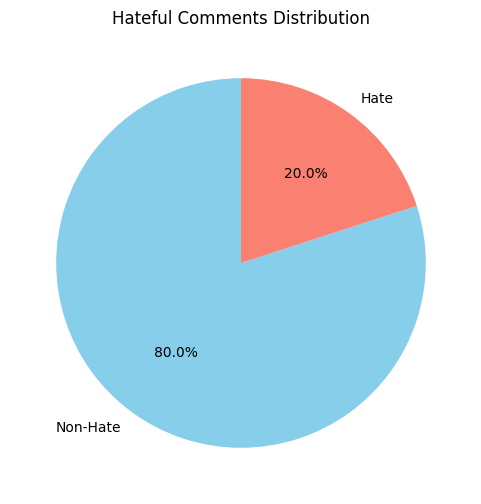

In [5]:
import matplotlib.pyplot as plt

hateful_counts = data['Hateful'].value_counts()
hateful_counts.index = ['Non-Hate' if i == 0 else 'Hate' for i in hateful_counts.index]

# Plot the pie chart
plt.figure(figsize=(6, 6))
hateful_counts.plot.pie(autopct='%1.1f%%', labels=hateful_counts.index, colors=['skyblue', 'salmon'], startangle=90)
plt.title("Hateful Comments Distribution")
plt.ylabel("")  
plt.show()


#### Daatset is imbalanced, so Oversampling the Dataset

RandomOverSampler is a technique used in machine learning to address class imbalance by oversampling the minority class. It is part of the imblearn (imbalanced-learn) library.

Advantage: It helps improve model performance by ensuring the model sees enough examples from the minority class during training

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Step 6: Data balancing
X = data[['Platform', 'Comment']]  # Features
y = data['Hateful']  # Target

# Use RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the balanced data back into a DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data.columns = ['Platform', 'Comment', 'Hateful']

# Check the new class distribution
print("Balanced Class Distribution:")
print(y_resampled.value_counts())

Balanced Class Distribution:
Hateful
0    2400
1    2400
Name: count, dtype: int64


#### Distribution of the dataset before and after balancing

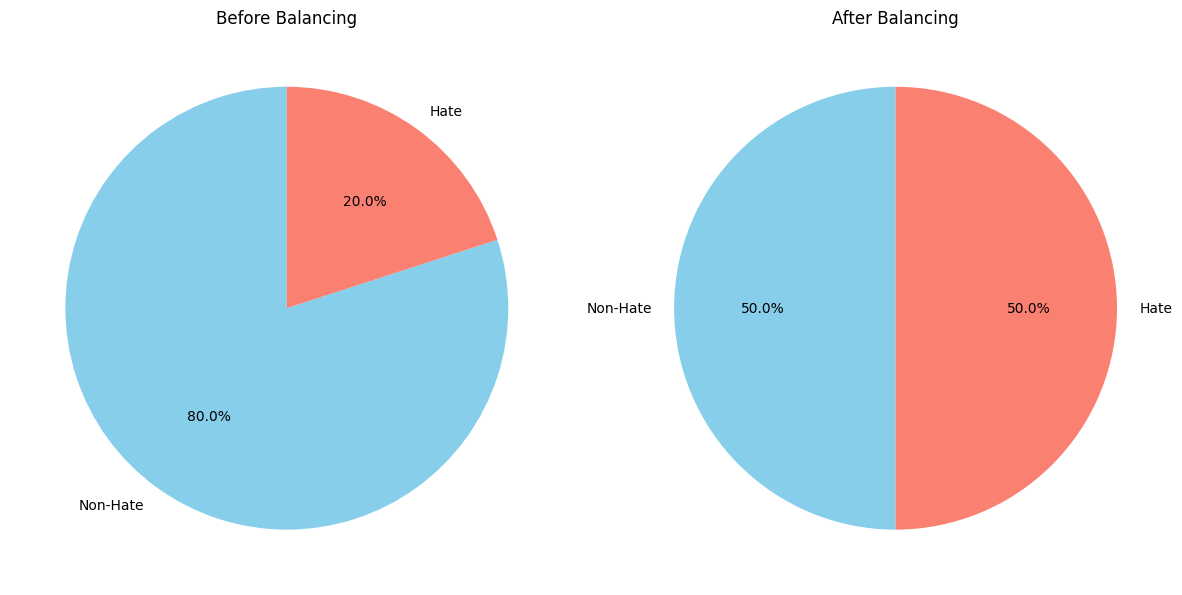

In [7]:
import matplotlib.pyplot as plt

#  Compare pie charts before and after balancing

before_counts = data['Hateful'].value_counts()
before_counts.index = ['Non-Hate' if i == 0 else 'Hate' for i in before_counts.index]

# After balancing
after_counts = y_resampled.value_counts()
after_counts.index = ['Non-Hate' if i == 0 else 'Hate' for i in after_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before balancing
axes[0].pie(before_counts, labels=before_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[0].set_title("Before Balancing")

# After balancing
axes[1].pie(after_counts, labels=after_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title("After Balancing")

# Display the charts
plt.tight_layout()
plt.show()

#### Pre-Processing Dataset

##### Lowercasing: 
Converts all characters in the text to lowercase for uniformity.
##### Removing Numbers: 
Removes all digits from the text to eliminate irrelevant data.
##### Removing Extra Whitespaces: 
Replaces multiple spaces with a single space and removes extra spaces.
##### Removing Special Characters: 
Eliminates non-alphabetic characters like punctuation and symbols.
##### Tokenization: 
Splits the text into individual words (tokens) for analysis.
##### Removing Stopwords:
Removes common words like "the" and "is" that don't add significant meaning.
##### Stemming: 
Reduces words to their root form (e.g., "running" to "run").
##### Returning Processed Text: 
Joins the processed tokens back into a single string of text.

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function for preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'Comment' column
balanced_data['Processed_Comment'] = balanced_data['Comment'].apply(preprocess_text)

# Display the first few rows of the processed data
print(balanced_data[['Comment', 'Processed_Comment']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Comment  \
0  Damn I thought they had strict gun laws in Ger...   
1  I dont care about what it stands for or anythi...   
2                  It's not a group it's an idea lol   
3                          So it's not just America!   
4  The dog is a spectacular dancer considering he...   

                             Processed_Comment  
0          damn thought strict gun law germani  
1    dont care stand anyth connect like shield  
2                               group idea lol  
3                                      america  
4  dog spectacular dancer consid two left feet  


#### Data Encoding and Transformation

In [9]:
data['Hateful'] = data['Hateful'].astype(int)

data_encoded = pd.get_dummies(data, columns=['Platform'])

print(data_encoded.tail())

                                                Comment  Hateful  \
2995  This is what Kike shilling looks like. Ryan ha...        1   
2996                            Not bait, they're right        0   
2997                             I like this one a lot.        0   
2998           Kikes making money off heroin what’s new        1   
2999  Desecrate men by making them gay/trannies, and...        1   

      Platform_4Chan  Platform_Reddit  Platform_Twitter  
2995            True            False             False  
2996            True            False             False  
2997            True            False             False  
2998            True            False             False  
2999            True            False             False  


#### Text Vectorization using TF-IDF

##### Term Frequency (TF): 
Measures how often a word appears in a document. Words that appear more often have a higher TF.
##### Inverse Document Frequency (IDF):
Measures how unique or rare a word is across all documents. Words that appear in fewer documents have a higher IDF.
##### TF-IDF: 
Combines TF and IDF to give a score for each word in each document. High TF and high IDF result in a high TF-IDF score, indicating the word is important to that document.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed comments
X_tfidf = tfidf_vectorizer.fit_transform(balanced_data['Processed_Comment'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)


TF-IDF Matrix Shape: (4800, 4695)


#### Dataset Splitting into Training, Validation, and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Split the dataset into train, validation, and test sets
X = X_tfidf  
y = balanced_data['Hateful']  

# Split into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (3840, 4695)
Validation Features Shape: (480, 4695)
Testing Features Shape: (480, 4695)


#### Model Training and Evaluation using Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#  Train a gradient boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_gb = gb_model.predict(X_train)

# Predict on the test set
y_test_pred_gb = gb_model.predict(X_test)

# Calculate training and test accuracy
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

# Print the accuracies
print("Gradient Boosting Training Accuracy:", train_accuracy_gb)
print("Gradient Boosting Test Accuracy:", test_accuracy_gb)


Gradient Boosting Training Accuracy: 0.9213541666666667
Gradient Boosting Test Accuracy: 0.9166666666666666


#### Confusion Matrix Visualization

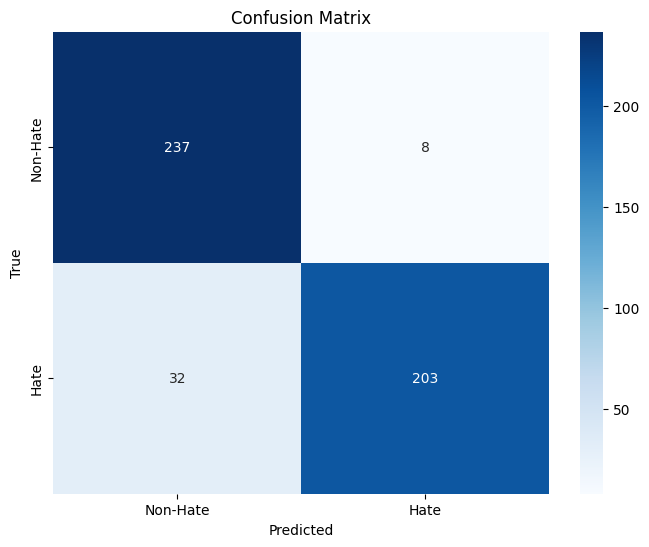

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_gb)

# Plotting the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Detailed Classification Report for Gradient Boosting

In [14]:
from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_test, y_test_pred_gb)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.96      0.86      0.91       235

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



#### ROC Curve Analysis

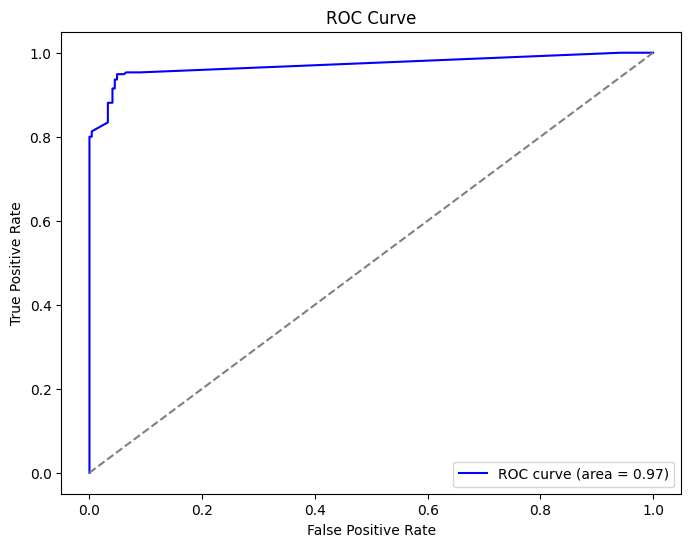

In [15]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall Curve Visualization

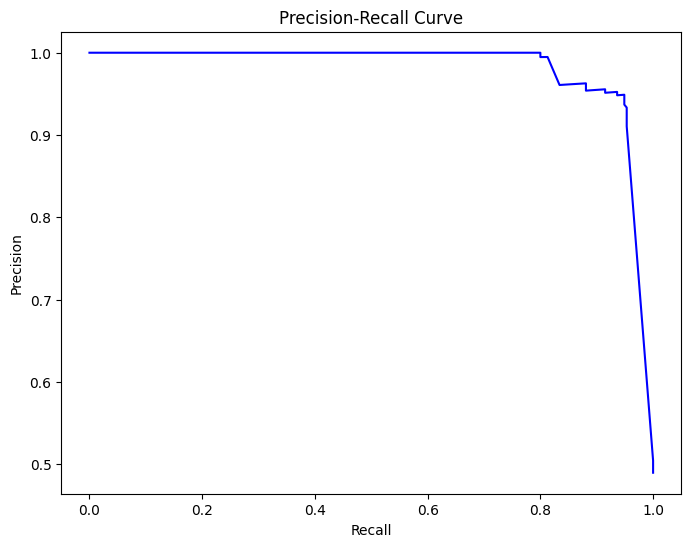

In [16]:
from sklearn.metrics import precision_recall_curve

#  Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


#### Model Training and Evaluation using Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # max_iter ensures convergence in case of large datasets
model.fit(X_train, y_train)

#  Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9901041666666667
Test Accuracy: 0.9854166666666667


#### Detailed Classification Report for Logistic regression

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       245
           1       0.99      0.98      0.99       235

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



#### ROC Curve for Logistic Regression

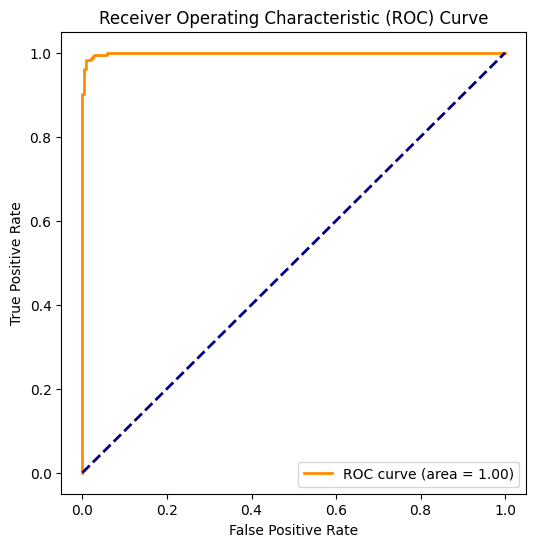

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall Curve

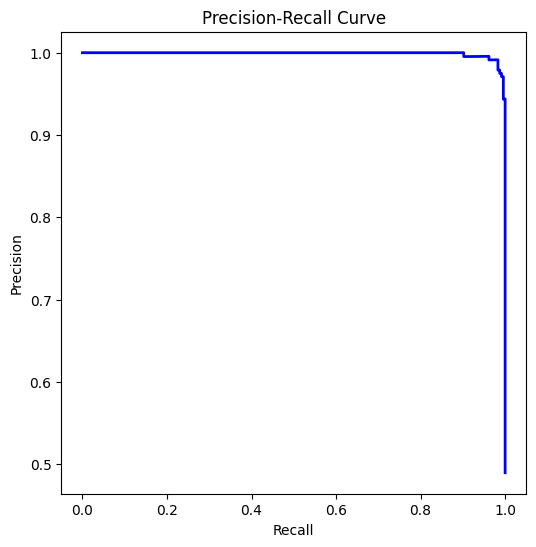

In [20]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### Model Training and Evaluation using Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate training and test accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the accuracies
print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9875


#### Random Forest Classification Report

In [22]:

print("Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       235

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



#### Random Forest Receiver Operating Characteristic (ROC) Curve

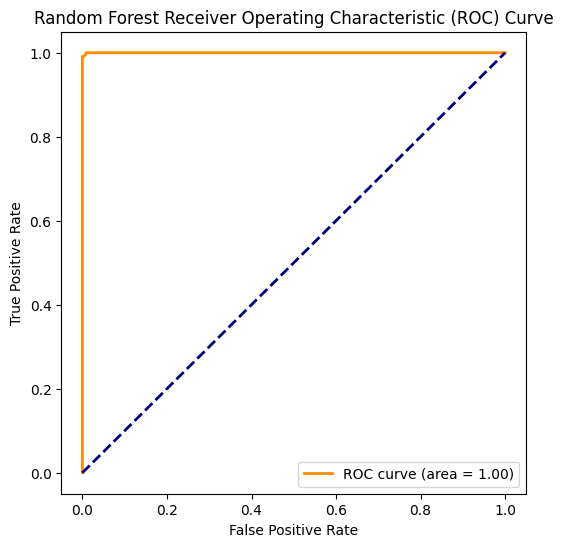

In [23]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Precision-Recall Curve

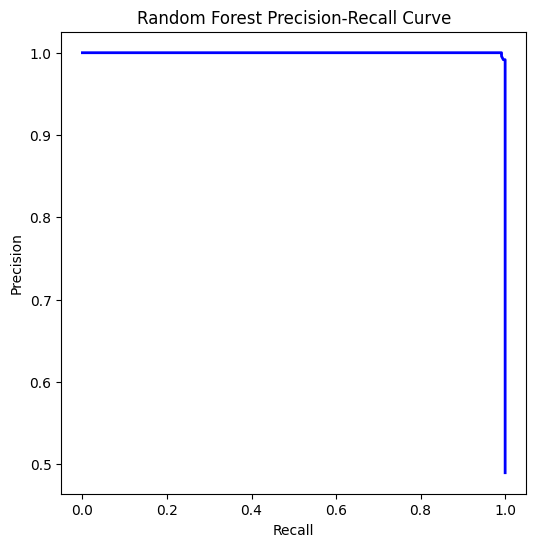

In [24]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall_rf, precision_rf, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.show()

#### Feature Importance Visualization using Random Forest

C:\Users\varma\AppData\Local\Temp\ipykernel_1092\1962735146.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:20]], y=features[indices[:20]], palette='coolwarm')


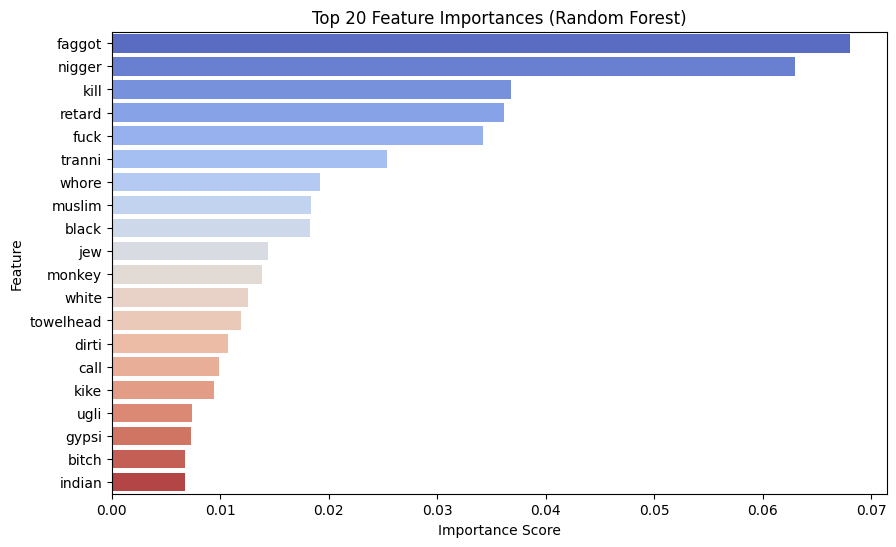

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_model.feature_importances_
features = tfidf_vectorizer.get_feature_names_out()

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the top 20 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances (Random Forest)")
sns.barplot(x=importances[indices[:20]], y=features[indices[:20]], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


#### Model Training and Evaluation using Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

#  Predict on the training set
y_train_pred_svm = svm_model.predict(X_train)

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate training and test accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Print the accuracies
print("SVM Training Accuracy:", train_accuracy_svm)
print("SVM Test Accuracy:", test_accuracy_svm)


SVM Training Accuracy: 1.0
SVM Test Accuracy: 0.9958333333333333


#### SVM Classification Report

In [27]:
print("SVM Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       245
           1       1.00      0.99      1.00       235

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [28]:
!pip install tensorflow


  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.26.0 requires typing-extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.
python-pptx 1.0.2 requires typing-extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.5.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


#### Training and Evaluation using LSTM Model

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(balanced_data['Processed_Comment'])
X = tokenizer.texts_to_sequences(balanced_data['Processed_Comment'])
X_pad = pad_sequences(X, maxlen=100)

y = balanced_data['Hateful']

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
test_accuracy_sklearn = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy (sklearn):", test_accuracy_sklearn)


Epoch 1/5
60/60 - 36s - loss: 0.5369 - accuracy: 0.7945 - val_loss: 0.2403 - val_accuracy: 0.9292 - 36s/epoch - 605ms/step
Epoch 2/5
60/60 - 31s - loss: 0.1027 - accuracy: 0.9701 - val_loss: 0.0770 - val_accuracy: 0.9729 - 31s/epoch - 524ms/step
Epoch 3/5
60/60 - 32s - loss: 0.0240 - accuracy: 0.9948 - val_loss: 0.0562 - val_accuracy: 0.9823 - 32s/epoch - 536ms/step
Epoch 4/5
60/60 - 32s - loss: 0.0102 - accuracy: 0.9984 - val_loss: 0.0708 - val_accuracy: 0.9812 - 32s/epoch - 532ms/step
Epoch 5/5
60/60 - 29s - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0583 - val_accuracy: 0.9823 - 29s/epoch - 491ms/step
30/30 [==============================] - 2s 40ms/step - loss: 0.0583 - accuracy: 0.9823

Test Accuracy: 0.9822916388511658
30/30 [==============================] - 2s 42ms/step

Test Accuracy (sklearn): 0.9822916666666667


In [30]:
!pip install keras-tuner --upgrade

#### Optimizing LSTM Model for Hateful Comment Detection with Hyperparameter Tuning

In [31]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.optimizers import Adam

# Define a HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=5000, 
                            output_dim=hp.Int('embedding_dim', min_value=100, max_value=256, step=32), 
                            input_length=100))
        model.add(SpatialDropout1D(hp.Float('spatial_dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=200, step=64), 
                       dropout=hp.Float('lstm_dropout', min_value=0.2, max_value=0.5, step=0.1), 
                       recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])
        return model

# Initialize the tuner
tuner = RandomSearch(
    MyHyperModel(), 
    objective='val_accuracy', 
    max_trials=3,  # Set for 3 trials
    executions_per_trial=1, 
    directory='my_dir', 
    project_name='hateful_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, 
             epochs=5,  # Set for 5 epochs
             batch_size=64, 
             validation_data=(X_test, y_test),
             verbose=2)

# Get all trials and display their results
print("\n--- Trial Results ---\n")
for trial in tuner.oracle.get_best_trials(num_trials=3):
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Final Validation Accuracy: {trial.score}\n")

# Retrieve and print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

# Train the best model
best_model = tuner.hypermodel.build(best_hyperparameters)
history = best_model.fit(X_train, y_train, 
                         epochs=5, 
                         batch_size=64, 
                         validation_data=(X_test, y_test), 
                         verbose=2)

# Evaluate the best model and print the accuracy
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("\nTest Accuracy with Best Hyperparameters:", test_accuracy)


Trial 3 Complete [00h 05m 26s]
val_accuracy: 0.9864583611488342

Best val_accuracy So Far: 0.9864583611488342
Total elapsed time: 00h 40m 19s

--- Trial Results ---

Trial ID: 2
Hyperparameters: {'embedding_dim': 228, 'spatial_dropout_rate': 0.4, 'lstm_units': 128, 'lstm_dropout': 0.2, 'recurrent_dropout': 0.2, 'learning_rate': 0.0016113868585596071}
Final Validation Accuracy: 0.9864583611488342

Trial ID: 1
Hyperparameters: {'embedding_dim': 132, 'spatial_dropout_rate': 0.2, 'lstm_units': 64, 'lstm_dropout': 0.2, 'recurrent_dropout': 0.2, 'learning_rate': 0.0005793883362660432}
Final Validation Accuracy: 0.9854166706403097

Trial ID: 0
Hyperparameters: {'embedding_dim': 132, 'spatial_dropout_rate': 0.30000000000000004, 'lstm_units': 192, 'lstm_dropout': 0.30000000000000004, 'recurrent_dropout': 0.4, 'learning_rate': 0.0005702557437126698}
Final Validation Accuracy: 0.9802083373069763

Best Hyperparameters: {'embedding_dim': 228, 'spatial_dropout_rate': 0.4, 'lstm_units': 128, 'lstm_dr

#### Confusion Matrix Visualization

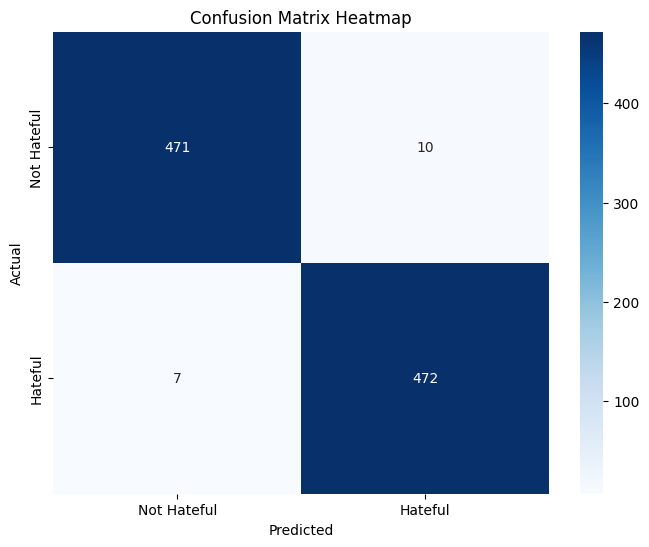

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Ploting cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hateful', 'Hateful'], yticklabels=['Not Hateful', 'Hateful'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Training and Validation Loss Visualization

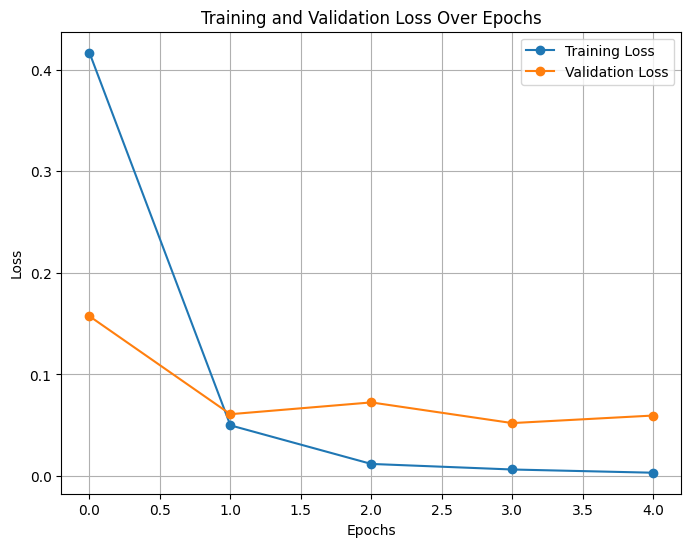

In [33]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss graph
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


#### LSTM Accuracy Curve (Training and Validation Accuracy Visualization)

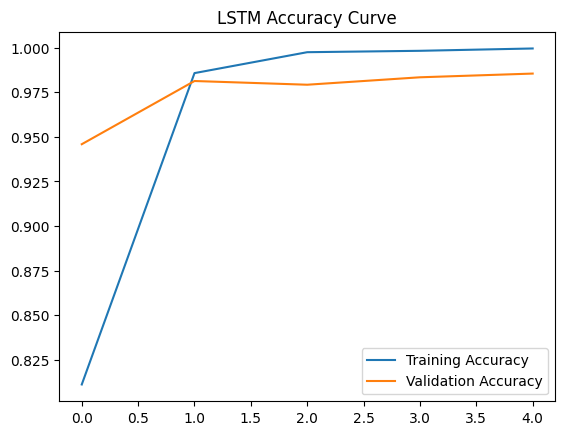

In [34]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy Curve')
plt.legend()
plt.show()

####  Predicting Hate or Non-Hate Text

In [35]:
def predict_hate_or_non_hate(text, model, tokenizer, max_len=100):

    text_processed = preprocess_text(text)  

    seq = tokenizer.texts_to_sequences([text_processed])

    padded_seq = pad_sequences(seq, maxlen=max_len)

    prediction = model.predict(padded_seq)

    if prediction > 0.5:
        return "Hate"
    else:
        return "Non-Hate"

# Example sentences for testing
texts = [
    "I can't believe how rude that Jew is",  
    "You are a black person.",  
    "I will kill you.",  
    "The weather is beautiful today, and I am enjoying the sunshine.",  
    "I love the way people help each other here; it's so inspiring."  
]

# Predict for each sentence
for text in texts:
    prediction = predict_hate_or_non_hate(text, model, tokenizer)
    print(f"Text: '{text}'\nPrediction: {prediction}\n")


1/1 [==============================] - 0s 369ms/step
Text: 'I can't believe how rude that Jew is'
Prediction: Hate

1/1 [==============================] - 0s 31ms/step
Text: 'You are a black person.'
Prediction: Hate

1/1 [==============================] - 0s 15ms/step
Text: 'I will kill you.'
Prediction: Hate

1/1 [==============================] - 0s 14ms/step
Text: 'The weather is beautiful today, and I am enjoying the sunshine.'
Prediction: Non-Hate

1/1 [==============================] - 0s 16ms/step
Text: 'I love the way people help each other here; it's so inspiring.'
Prediction: Non-Hate



#### Conclusion:
In this model comparison, we evaluated several machine learning algorithms for hate speech detection, including Gradient Boosting, Logistic Regression, Random Forest, SVM, and LSTM.

##### Gradient Boosting achieved an accuracy of 92%, with a balanced precision, recall, and F1-score across both classes, making it a strong performer.
##### Logistic Regression outperformed Gradient Boosting with a 99% accuracy, showing excellent performance across both classes, and achieving near-perfect precision, recall, and F1-scores.
##### Random Forest also performed excellently with a 99% accuracy, offering similar results to Logistic Regression, with excellent precision and recall for both classes.
##### Support Vector Machine (SVM) showed the best performance with a perfect accuracy of 99.58%, achieving outstanding precision and recall for both classes.
##### LSTM demonstrated great potential with an accuracy of 98.54% on the test set, showing impressive performance after five epochs with minimal loss, especially on the validation set.
##### Overall, SVM provides the highest accuracy, while Random Forest and Logistic Regression are strong contenders, all achieving near-perfect performance. The LSTM model also provides competitive results, making it suitable for text-based tasks like hate speech detection.